---
title: "independent samples t-test"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---


## Question

Are 12-year old girls significantly taller than 12-year old boys?

## Hypotheses

- Null hypothesis: Girls and boys have the same mean height.
- Alternative hypothesis: Girls are *significantly* taller.
- Significance level: 0.05

In [1]:
#| code-summary: "import libraries"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)
from scipy.stats import norm, ttest_ind, t
# %matplotlib widget

In [2]:
#| code-summary: "load data"
df_boys = pd.read_csv('../archive/data/height/boys_height_stats.csv', index_col=0)
df_girls = pd.read_csv('../archive/data/height/girls_height_stats.csv', index_col=0)
age = 12.0
mu_boys = df_boys.loc[age, 'mu']
mu_girls = df_girls.loc[age, 'mu']
sigma_boys = df_boys.loc[age, 'sigma']
sigma_girls = df_girls.loc[age, 'sigma']

In this example, we sampled 10 boys and 14 girls. See below the samples data and their underlying distributions.

In [3]:
#| code-summary: "generate data"
N_boys = 10
N_girls = 14
# set scipy seed for reproducibility
np.random.seed(314)
sample_boys = norm.rvs(size=N_boys, loc=mu_boys, scale=sigma_boys)
sample_girls = norm.rvs(size=N_girls, loc=mu_girls, scale=sigma_girls)

[Text(0.5, 0, 'height (cm)'), Text(0, 0.5, 'probability density')]

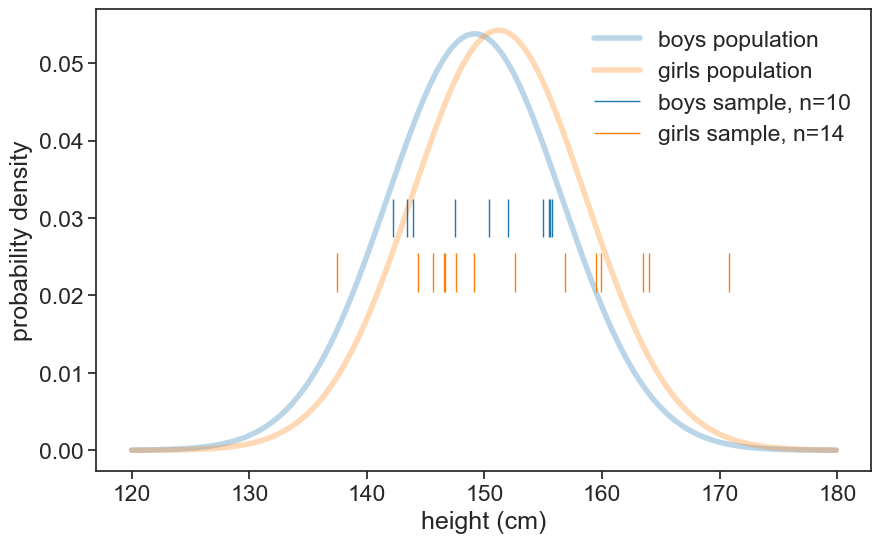

In [4]:
height_list = np.arange(120, 180, 0.1)
pdf_boys = norm.pdf(height_list, loc=mu_boys, scale=sigma_boys)
pdf_girls = norm.pdf(height_list, loc=mu_girls, scale=sigma_girls)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(height_list, pdf_boys, lw=4, alpha=0.3, color='tab:blue', label='boys population')
ax.plot(height_list, pdf_girls, lw=4, alpha=0.3, color='tab:orange', label='girls population')

ax.eventplot(sample_boys, orientation="horizontal", lineoffsets=0.03,
             linewidth=1, linelengths= 0.005,
             colors='tab:blue', label=f'boys sample, n={N_boys}')
ax.eventplot(sample_girls, orientation="horizontal", lineoffsets=0.023,
             linewidth=1, linelengths= 0.005,
             colors='tab:orange', label=f'girls sample, n={N_girls}')
ax.legend(frameon=False)
ax.set(xlabel='height (cm)',
       ylabel='probability density',
    )

To answer the question, we will use an independent samples t-test.

\begin{align}
t &= \frac{\bar{X}_1 - \bar{X}_2}{\Theta} \\
\Theta &= \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}
\end{align}

This is a generalization of the one-sample t-test. If we take one of the samples to be infinite, we get the one-sample t-test.

We can compute the t-statistic by ourselves, and compare the results with those of `scipy.stats.ttest_ind`.
Because we are interested in the difference between the means, we will use the `equal_var=False` option to compute Welch's t-test.
Also, because we are testing the alternative hypothesis that girls are taller, we will use the one sided test.

In [5]:
Theta = np.sqrt(sample_boys.std(ddof=1)**2/sample_boys.size + \
                sample_girls.std(ddof=1)**2/sample_girls.size)
t_stat = (sample_boys.mean() - sample_girls.mean()) / Theta
dof = N_boys + N_girls - 2
p_val = t.cdf(t_stat, dof)

# the option alternative="less" is used because we are testing whether the first sample (boys) is less than the second sample (girls)
t_value_scipy = ttest_ind(sample_boys, sample_girls, equal_var=False, alternative="less")

print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
print(f"t-statistic (scipy): {t_value_scipy.statistic:.3f}, p-value (scipy): {t_value_scipy.pvalue:.3f}")

t-statistic: -0.999, p-value: 0.164
t-statistic (scipy): -0.999, p-value (scipy): 0.165


We got the exact same results :)

Now let's visualize what the p-value means.

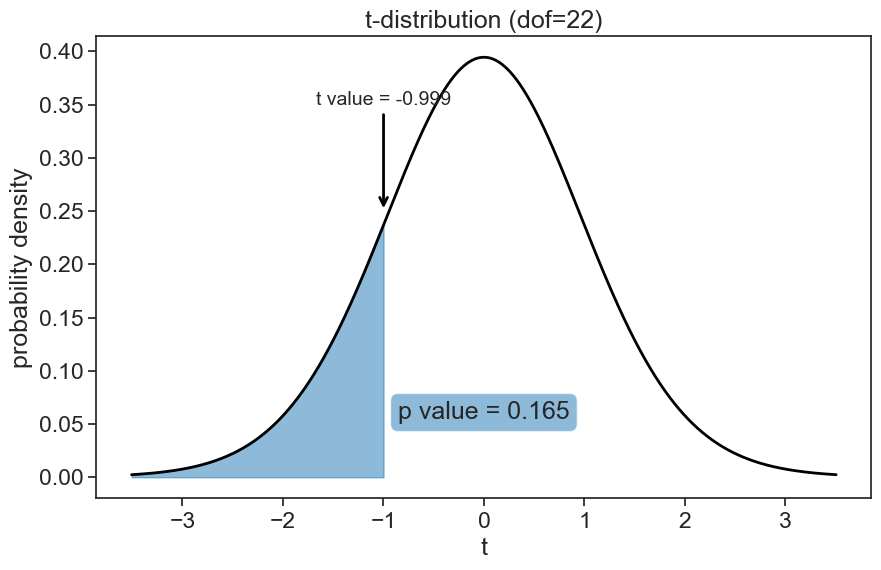

In [6]:
#| code-summary: "visualize t-distribution"
# degrees of freedom
fig, ax = plt.subplots(figsize=(10, 6))

t_array_min = np.round(t.ppf(0.001, dof),3)
t_array_max = np.round(t.ppf(0.999, dof),3)
t_array = np.arange(t_array_min, t_array_max, 0.001)

# annotate vertical array at t_value_scipy
ax.annotate(f"t value = {t_value_scipy.statistic:.3f}",
                        xy=(t_value_scipy.statistic, 0.25),
                        xytext=(t_value_scipy.statistic, 0.35),
                        fontsize=14,
                        arrowprops=dict(arrowstyle="->", lw=2, color='black'),
                        ha='center')
# fill between t-distribution and normal distribution
ax.fill_between(t_array, t.pdf(t_array, dof),
                 where=(t_array < t_value_scipy.statistic),
                 color='tab:blue', alpha=0.5,
                 label='rejection region')

# write t_value_scipy.pvalue on the plot
ax.text(0, 0.05,
        f"p value = {t_value_scipy.pvalue:.3f}", 
        ha='center', va='bottom',
        bbox=dict(facecolor='tab:blue', alpha=0.5, boxstyle="round"))

ax.plot(t_array, t.pdf(t_array, dof),
       color='black', lw=2)

ax.set(xlabel='t',
       ylabel='probability density',
       title="t-distribution (dof=22)",
       );

Because the p-value is higher than the significance level, we fail to reject the null hypothesis. This means that, based on the data, we cannot conclude that girls are significantly taller than boys.

## increasing sample size

Let's increase the sample size to see how it affects the p-value. We'll sample 250 boys and 200 girls now.

In [7]:
#| code-summary: "generate data"
N_boys = 250
N_girls = 200
# set scipy seed for reproducibility
np.random.seed(314)
sample_boys = norm.rvs(size=N_boys, loc=mu_boys, scale=sigma_boys)
sample_girls = norm.rvs(size=N_girls, loc=mu_girls, scale=sigma_girls)

[Text(0.5, 0, 'height (cm)'), Text(0, 0.5, 'probability density')]

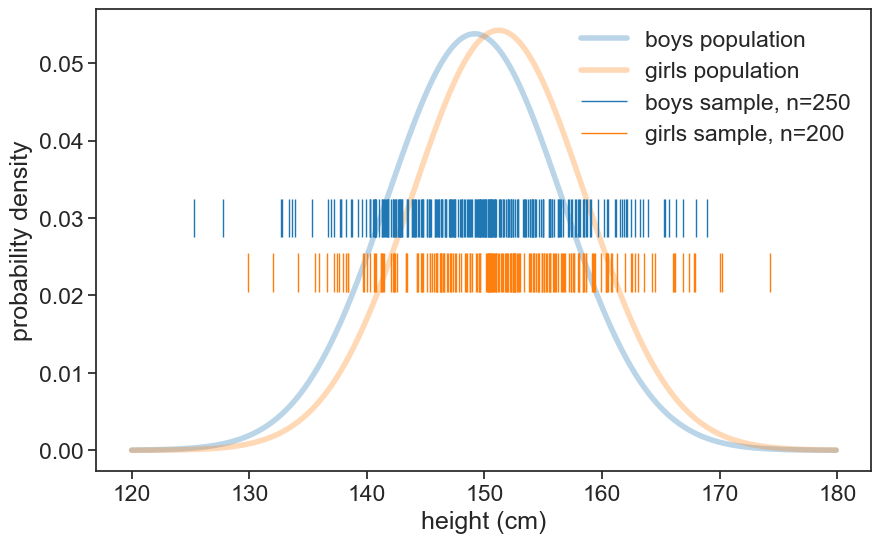

In [8]:
height_list = np.arange(120, 180, 0.1)
pdf_boys = norm.pdf(height_list, loc=mu_boys, scale=sigma_boys)
pdf_girls = norm.pdf(height_list, loc=mu_girls, scale=sigma_girls)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(height_list, pdf_boys, lw=4, alpha=0.3, color='tab:blue', label='boys population')
ax.plot(height_list, pdf_girls, lw=4, alpha=0.3, color='tab:orange', label='girls population')

ax.eventplot(sample_boys, orientation="horizontal", lineoffsets=0.03,
             linewidth=1, linelengths= 0.005,
             colors='tab:blue', label=f'boys sample, n={N_boys}')
ax.eventplot(sample_girls, orientation="horizontal", lineoffsets=0.023,
             linewidth=1, linelengths= 0.005,
             colors='tab:orange', label=f'girls sample, n={N_girls}')
ax.legend(frameon=False)
ax.set(xlabel='height (cm)',
       ylabel='probability density',
    )

In [9]:
Theta = np.sqrt(sample_boys.std(ddof=1)**2/sample_boys.size + \
                sample_girls.std(ddof=1)**2/sample_girls.size)
t_stat = (sample_boys.mean() - sample_girls.mean()) / Theta
dof = N_boys + N_girls - 2
p_val = t.cdf(t_stat, dof)

# the option alternative="less" is used because we are testing whether the first sample (boys) is less than the second sample (girls)
t_value_scipy = ttest_ind(sample_boys, sample_girls, equal_var=False, alternative="less")

print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
print(f"t-statistic (scipy): {t_value_scipy.statistic:.3f}, p-value (scipy): {t_value_scipy.pvalue:.3f}")

t-statistic: -2.639, p-value: 0.004
t-statistic (scipy): -2.639, p-value (scipy): 0.004


We found now a p-value lower than the significance level, so we reject the null hypothesis. This means that, based on the data, we can conclude that girls are significantly taller than boys.